In [ ]:
# Sentiment analysis is a technique that detects the underlying sentiment in a piece of text.
# It is the process of classifying text as either positive, negative, or neutral.
# Machine learning techniques are used to evaluate a piece of text and determine the sentiment behind it.



In [1]:
!pip install plotly

In [2]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 3.7 MB/s eta 0:00:01


In [3]:
!pip install nltk

In [4]:
! pip install Scikit-Learn

In [5]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 4.2 MB/s eta 0:00:01


In [ ]:
# Step 1: Read the Dataframe and Checking the head of the dataframe

# The data set contains user reviews for different products in the food category.


In [8]:
import warnings
warnings.filterwarnings ('ignore')
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# We can see that the dataframe contains some product, user and review information.

In [ ]:
# Step 2: Data Analysis

# Now, we will take a look at the variable “Score” to see if majority of the customer ratings are positive or negative.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


# Product Scores
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

In [ ]:
# From here, we can see that most of the customer rating is positive. 
# This leads us to believe that most reviews will be pretty positive too, which will be analyzed in a while.



#  Now, we can create some wordclouds to see the most frequently used words in the reviews.


In [10]:
from wordcloud import WordCloud

In [ ]:
# Limit the dataset 
# this line creates a smaller sample of the dataset if the run time is too slow:
# df = df.iloc[:10000]

In [11]:
df = df.iloc[:10000]

[nltk_data] Downloading package stopwords to /Users/jay/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


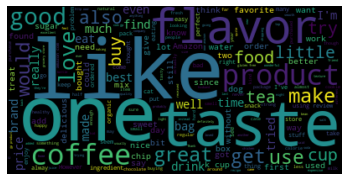

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)


# Create word cloud
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
# Step 3: Sentiment analysis with VADER
# In this section, sentiment scores are obtained with VADER  

# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is
# specifically attuned to sentiments expressed in social media.
# https://github.com/cjhutto/vaderSentiment

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
example = 'The food was good.'
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(example)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [20]:
# some preprocessing steps which could be utilized; however, in this project, VADER handles
# the preprocessing steps within itself, so they are commented here

In [21]:
# def remove_punctuation(text):
#     final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
#     return final

# from redditscore.tokenizer import CrazyTokenizer
# def tokenize(text):
#     tokenizer = CrazyTokenizer()
#     tokens = tokenizer.tokenize(text)
#     preprocessed_tokens = []
#     for w in tokens:
#         w = replaceElongated(w)
#         if w not in stop_words:
#             # w = spellCorection(w)
#             preprocessed_tokens.append(w)
#     return preprocessed_tokens

# def removeUnicode(text):
#     """ Removes unicode strings like "\u002c" and "x96" """
#     text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)
#     text = re.sub(r'[^\x00-\x7f]',r'',text)
#     return text

# def replaceURL(text):
#     text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text) 
#     return text

# def replaceEmail(text):
#     """ Replaces url address with "url" """
#     text = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b','email',text)  
#     return text

# def removeHashtagInFrontOfWord(text):
#     """ Removes hastag in front of a word """
#     text = re.sub(r'#([^\s]+)', r'\1', text)
#     return text



# df['Text'] = df['Text'].apply(remove_punctuation)
# df['Text'] = df['Text'].apply(removeUnicode)
# df['Text'] = df['Text'].apply(replaceURL)
# df['Text'] = df['Text'].apply(replaceEmail)
# df['Text'] = df['Text'].apply(removeHashtagInFrontOfWord)
# df['Tokens'] = df['Text'].apply(tokenize)

In [ ]:
# applying the model on our dataset

In [16]:
df[['neg', 'neu', 'pos', 'compound']] = df['Text'].apply(sid.polarity_scores).apply(pd.Series)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.711,0.289,0.9441
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...,0.085,0.771,0.144,0.8138
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...,0.000,0.932,0.068,0.4404
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.599,0.401,0.9468


In [ ]:
# assign reviews with compound > 0 as positive sentiment
# compound < 0 negative sentiment
# remove score = 0

In [17]:
df = df[df['compound'] != 0]
df['sentiment'] = df['compound'].apply(lambda rating : +1 if rating > 0 else -1)

In [18]:
print("negative samples:",len(df[df["sentiment"]==-1]))
print("postitive samples:",len(df[df["sentiment"]==1]))

negative samples: 1015
postitive samples: 8860


In [19]:
# split df - positive and negative sentiment:


In [20]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [21]:
# export csv files

In [22]:
positive.to_csv("positive.csv")
negative.to_csv("negative.csv")

In [ ]:
# Now that we have classified tweets into positive and negative, let’s build wordclouds for each!

In [ ]:
# Creating wordcloud for positive comments

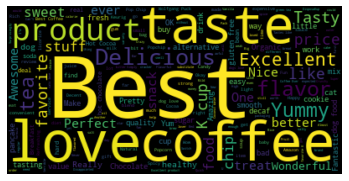

In [23]:
# stopwords = set(STOPWORDS)

stopwords.update(["br", "href","good","great"]) 

## good and great removed because they were included in negative sentiment

pos = " ".join(str(review) for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Creating wordcloud for negetive comments

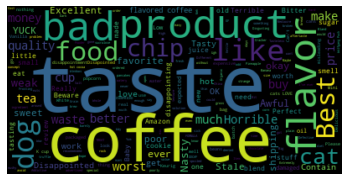

In [24]:
neg = " ".join(str(review) for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
# Finaly, we can take a look at the distribution of reviews with sentiment across the dataset

In [25]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [ ]:
# Step: Building the model

# Finally, we can build the sentiment analysis model! 
# This model will take reviews in as input. 
# It will then come up with a prediction on whether the review is positive or negative.

# This is a classification task, so we will train a simple logistic regression model to do it.



In [ ]:
# We will be using the summary data to come up with predictions. First, we need to remove all punctuation from the data.

In [26]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [ ]:
## Split the Dataframe
# The new data frame should only have two columns — “Summary” (the review text data), and “sentiment” (the target variable).

In [27]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,Delight says it all,1
3,Cough Medicine,1
4,Great taffy,1


In [ ]:
## training the sentiment analysis model

## We will now split the data frame into train and test sets. 
##80% of the data will be used for training, and 20% will be used for testing.
# random split train and test data

In [28]:
import numpy as np

In [29]:
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [ ]:
# Step: Create a bag of words

# Next, we will use a count vectorizer from the Scikit-learn library.

# We will need to convert the text into a bag-of-words model since the logistic regression algorithm cannot understand text.

In [30]:
# count vectorizer:


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [31]:
# Logistic Regression


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [32]:
# Split target and independent variables

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [33]:
# Fit model on data


lr.fit(X_train,y_train)

LogisticRegression()

In [34]:
# Make predictions:


predictions = lr.predict(X_test)

In [35]:
# Step 6: Testing

# Now, we can test the accuracy of our model!

# You will get a confusion matrix

In [36]:
# find accuracy, precision, recall:


from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[  18,   20],
       [ 218, 1867]])

In [37]:
# The classification report:

In [38]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.08      0.47      0.13        38
           1       0.99      0.90      0.94      2085

    accuracy                           0.89      2123
   macro avg       0.53      0.68      0.54      2123
weighted avg       0.97      0.89      0.93      2123



In [ ]:
# The overall accuracy of the model on the test data is around 90%, 
# which is pretty good considering we didn’t do any feature extraction